# Install dependencies

In [ ]:
!pip install pm4py

# Load data

In [ ]:
import pm4py

df = pm4py.read_csv('/content/gene expression with timestamp.csv',
                      sep=',')
dataframe = pm4py.format_dataframe(df, 
                                   case_id='gene_id',
                                   activity_key='EVENT',
                                   timestamp_key='TIMESTAMP')
dataframe[:12]

,case:concept:name,gene,parent_lineage,lineage,is_TF,is_lineage_signature_TF,AverageEmbryoTimeLineage,time:timestamp,concept:name,concatenated,@@index
4412,WBGene00000001,aap-1,ABarpap/ABplaaa,ABarpapp/ABplaaap,False,False,147.0,2020-11-11 02:27:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,4412
30550,WBGene00000001,aap-1,ABpxaappa,ABpxaappaa,False,False,229.0,2020-11-11 03:49:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,30550
33421,WBGene00000001,aap-1,ABalaaapal/ABalaaappr,ABalaaapalr/ABalaaapprl,False,False,235.0,2020-11-11 03:55:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,33421
34916,WBGene00000001,aap-1,ABalaaapal/ABalaaappr,ABpxaapaaap/ABalaaapall/ABalaaapprr/ABalppapap...,False,False,235.0,2020-11-11 03:55:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,34916
50760,WBGene00000001,aap-1,ABalppapap/ABarapppap,ABpxaapaaap/ABalaaapall/ABalaaapprr/ABalppapap...,False,False,250.0,2020-11-11 04:10:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,50760
81904,WBGene00000001,aap-1,ABpxaapaaa,ABpxaapaaap/ABalaaapall/ABalaaapprr/ABalppapap...,False,False,269.0,2020-11-11 04:29:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,81904
108569,WBGene00000001,aap-1,ABprpappaa,ABprpappaaa,False,False,284.0,2020-11-11 04:44:00+00:00,expression_lost_in_daughter,WBGene00000001-expression_lost_in_daughter,108569
15578,WBGene00000002,aat-1,ABalpappa/ABarapapa,ABalpappap,False,False,197.0,2020-11-11 03:17:00+00:00,expression_gained_in_daughter,WBGene00000002-expression_gained_in_daughter,15578
20352,WBGene00000002,aat-1,ABaraaaap,ABaraaaapa,False,False,204.0,2020-11-11 03:24:00+00:00,expression_gained_in_daughter,WBGene00000002-expression_gained_in_daughter,20352
24466,WBGene00000002,aat-1,ABalpaapa/ABaraaapa,ABalpaapap/ABaraaapap,False,False,213.0,2020-11-11 03:33:00+00:00,expression_gained_in_daughter,WBGene00000002-expression_gained_in_daughter,24466


## convert to event log

In [ ]:
from pm4py.objects.conversion.log import converter as log_converter

event_log = log_converter.apply(dataframe)
event_log

[{'attributes': {'concept:name': 'WBGene00000001'}, 'events': [{'gene': 'aap-1', 'parent_lineage': 'ABarpap/ABplaaa', 'lineage': 'ABarpapp/ABplaaap', 'is_TF': False, 'is_lineage_signature_TF': False, 'AverageEmbryoTimeLineage': 147.0, 'time:timestamp': Timestamp('2020-11-11 02:27:00+0000', tz='UTC'), 'concept:name': 'expression_lost_in_daughter', 'concatenated': 'WBGene00000001-expression_lost_in_daughter', '@@index': 4412}, '..', {'gene': 'aap-1', 'parent_lineage': 'ABprpappaa', 'lineage': 'ABprpappaaa', 'is_TF': False, 'is_lineage_signature_TF': False, 'AverageEmbryoTimeLineage': 284.0, 'time:timestamp': Timestamp('2020-11-11 04:44:00+0000', tz='UTC'), 'concept:name': 'expression_lost_in_daughter', 'concatenated': 'WBGene00000001-expression_lost_in_daughter', '@@index': 108569}]}, '....', {'attributes': {'concept:name': 'WBGene00271706'}, 'events': [{'gene': 'D2089.8', 'parent_lineage': 'ABarpap/ABplaaa', 'lineage': 'ABarpapp/ABplaaap', 'is_TF': False, 'is_lineage_signature_TF': Fals

# Mining

## Inductive miner and process tree

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(event_log)#, parameters=parameters)

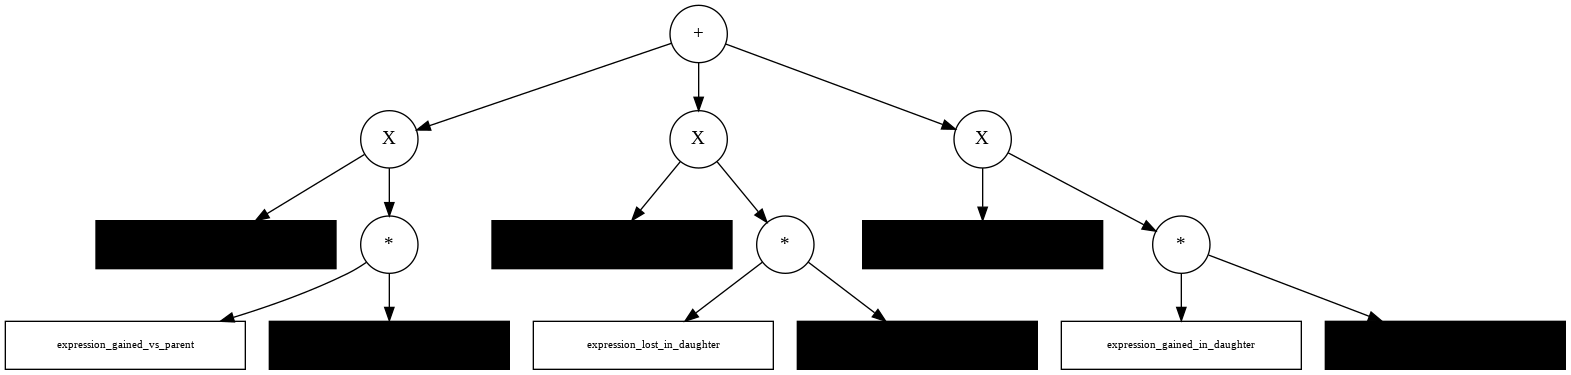

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(event_log)#, parameters=parameters)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Heuristics miner and heuristics net

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(event_log)#,parameters=parameters)

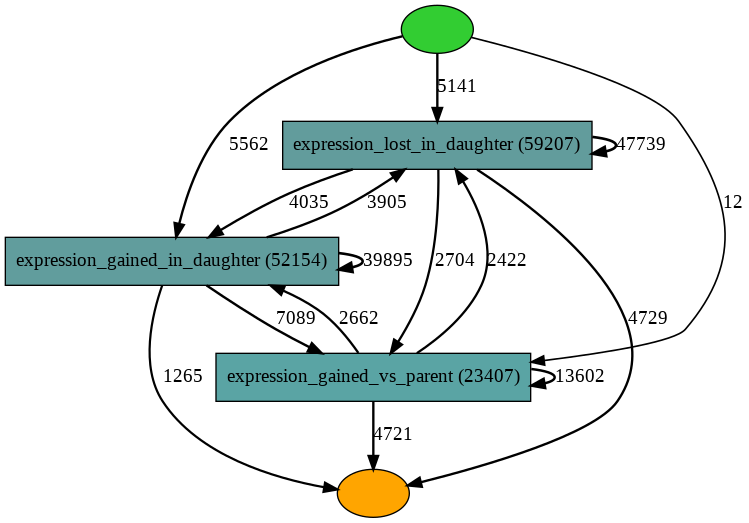

In [ ]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## Correlation miner

Assumes CASE ID does not exist. 

In [ ]:
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner

parameters={correlation_miner.Variants.CLASSIC.value.Parameters.ACTIVITY_KEY: "concept:name",
            correlation_miner.Variants.CLASSIC.value.Parameters.TIMESTAMP_KEY: "time:timestamp"}
frequency_dfg, performance_dfg = correlation_miner.apply(event_log,
                                                         parameters=parameters)

In [ ]:
activities_freq = dict(df["EVENT"].value_counts())
activities_freq

{'expression_gained_in_daughter': 52154,
 'expression_gained_vs_parent': 23407,
 'expression_lost_in_daughter': 59207}

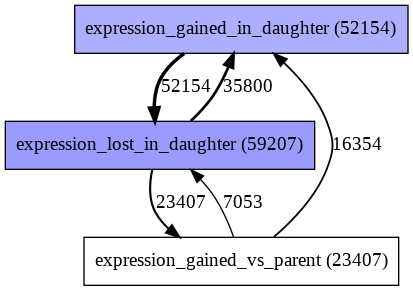

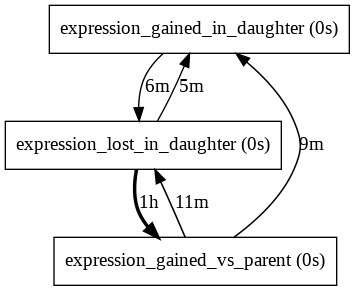

In [ ]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
gviz_freq = dfg_visualizer.apply(frequency_dfg,
                                 variant=dfg_visualizer.Variants.FREQUENCY,
                                 activities_count=activities_freq, 
                                 parameters={"format": "png"})
gviz_perf = dfg_visualizer.apply(performance_dfg, 
                                 variant=dfg_visualizer.Variants.PERFORMANCE,
                                 activities_count=activities_freq, 
                                 parameters={"format": "png"})
dfg_visualizer.view(gviz_freq)
dfg_visualizer.view(gviz_perf)

'''the results are two images:
- the first shows a net with frequencies
-the second - average duration between events'''